In [15]:
from scipy.io import arff
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import time

In [35]:
data1 = arff.loadarff(open('datasets/artificial/R15.arff','r'))
data2 = arff.loadarff(open('datasets/artificial/diamond9.arff','r'))
data3 = arff.loadarff(open('datasets/artificial/spherical_4_3.arff','r')) 

#Datasets for agglomerative clustering
data4 = arff.loadarff(open('datasets/artificial/zelnik3.arff','r'))
data5 = arff.loadarff(open('datasets/artificial/complex9.arff','r')) 
data6 = arff.loadarff(open('datasets/artificial/banana.arff','r'))


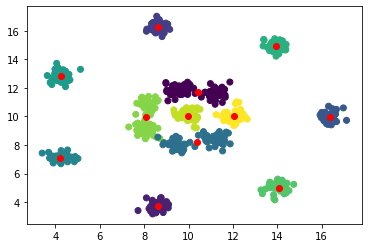

In [3]:
df = pd.DataFrame(data1[0])
#print(df)
X1, Y1 = [], []
X, Y = df['x'], df['y']

kmeans = KMeans(n_clusters = 12, random_state=0).fit(df)

plt.plot(X1, Y1)
plt.scatter(X, Y, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')

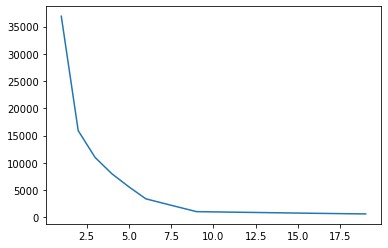

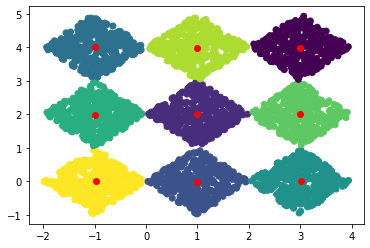

In [14]:
data = data2
df = pd.DataFrame(data[0])
X, Y = df['x'], df['y']
#print(df)

X2, Y2 = [], []

j = 20

for i in range(1,j):
    kmeans = KMeans(n_clusters = i, random_state=0).fit(df)
    X2.append(i)
    Y2.append(kmeans.inertia_)
    
max_iner = Y2[0]
pourcentage = 0.05
best_cluster_number = len(Y2)

for i in range(1, len(Y2)):
    
    ecart = Y2[i - 1] - Y2[i]  
    #print(f"i = {i}, Y2-1 = {Y2[i - 1]}, Y2 = {Y2[i]}")
    if (ecart < Y2[i - 1] * pourcentage):
        #print(f"Le meilleur nombre de cluster est {i}")
        best_cluster_number = i
        break

plt.figure()
plt.plot(X2, Y2)

kmeans = KMeans(n_clusters = best_cluster_number, random_state=0).fit(df)
plt.figure()
plt.scatter(X, Y, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')

In [ ]:
time_tab = []

time_start = time.time()
n = 20

for i in range(1,n):
    time_start = time.time()
    kmeans = KMeans(n_clusters = i, random_state=0).fit(df)
    X1.append(i)
    Y1.append(kmeans.inertia_)
    time_end = time.time()
    time_exec = time_end - time_start
    time_tab.append(time_exec)
    
print(time_tab)
    
    
X = np.linspace(1,n - 1,n - 1)
plt.figure()
plt.plot(X, time_tab)

            x         y CLASS
0    0.176401  0.621595  b'3'
1    0.166671  0.609044  b'3'
2    0.163073  0.607161  b'3'
3    0.168003  0.602865  b'3'
4    0.147131  0.590259  b'3'
..        ...       ...   ...
261  0.562428  0.599535  b'1'
262  0.556821  0.573417  b'1'
263  0.581445  0.642915  b'1'
264  0.560636  0.634291  b'1'
265  0.297056  0.358708  b'3'

[266 rows x 3 columns]


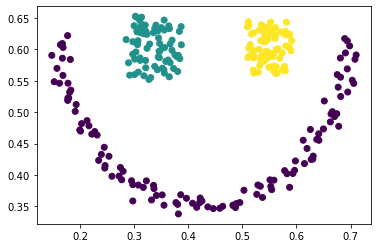

In [38]:
df = pd.DataFrame(data4[0])
print(df)
X1, Y1 = [], []
X3, Y3 = df['x'], df['y']

clusters = AgglomerativeClustering(n_clusters=3).fit(df)
plt.figure()
plt.scatter(X3, Y3, c = clusters.labels_)
